In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("utkface_nima.csv", header=None, names=["filename", "score"])

In [3]:
df.describe()

,score
count,5128.000000
mean,4.038261
std,0.848125
min,2.474464
25%,3.410195
50%,3.758538
75%,4.604536
max,6.750009


In [4]:
df.loc[df['score'].idxmin()]

filename    5_0_0_20170105162448427.png
score                          2.474464
Name: 4507, dtype: object

<Axes: xlabel='None', ylabel='score'>

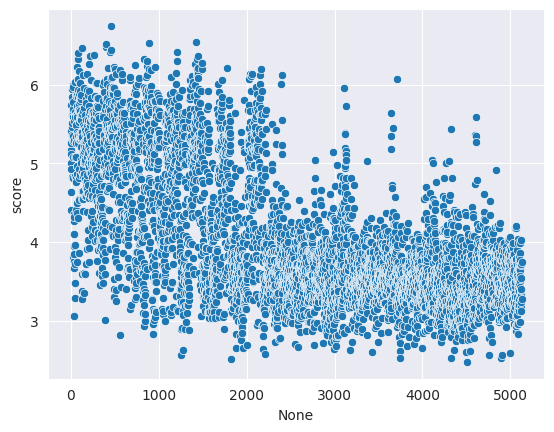

In [5]:
sns.scatterplot(x=df.index, y=df['score'])

In [44]:
value = np.percentile(df['score'], 25)
value

3.4101949334144592

In [6]:
ucb_acc_df = pd.read_csv("ucb_accurate.csv", header=None, names=["filename", "score"])

In [7]:
ucb_acc_df.describe()

,score
count,98.000000
mean,4.212971
std,0.906272
min,2.556037
25%,3.491095
50%,4.050447
75%,4.968205
max,6.486164


In [8]:
ucb_mod_df = pd.read_csv("ucb_moderate.csv", header=None, names=["filename", "score"])

In [9]:
ucb_mod_df.describe()

,score
count,90.000000
mean,4.693992
std,0.798757
min,3.152787
25%,4.035128
50%,4.768296
75%,5.349059
max,6.357964


In [10]:
ucb_imprecise_df = pd.read_csv("ucb_imprecise.csv", header=None, names=["filename", "score"])

In [11]:
ucb_imprecise_df.describe()

,score
count,83.000000
mean,4.981544
std,0.796849
min,3.213616
25%,4.446207
50%,5.132782
75%,5.568831
max,6.226375


<Axes: xlabel='None', ylabel='score'>

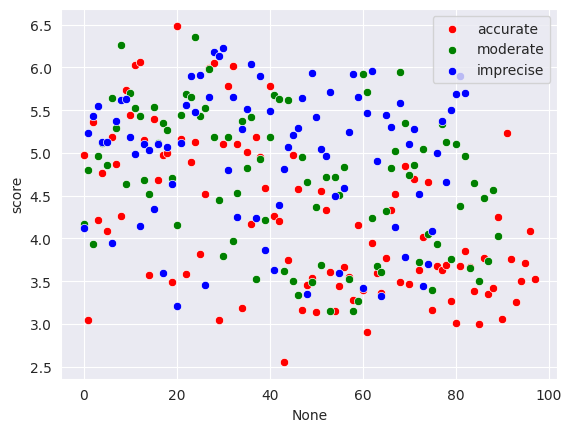

In [12]:
# Create a list of dataframes
dataframes = [ucb_acc_df, ucb_mod_df, ucb_imprecise_df]

# Create a list of colors for the dataframes
colors = ['red', 'green', 'blue']

# Create the scatterplot
sns.scatterplot(x=ucb_acc_df.index, y='score', data=ucb_acc_df, color=colors[0], label='accurate')
sns.scatterplot(x=ucb_mod_df.index, y='score', data=ucb_mod_df, color=colors[1], label='moderate')
sns.scatterplot(x=ucb_imprecise_df.index, y='score', data=ucb_imprecise_df, color=colors[2], label='imprecise')

In [13]:
combined_df = pd.concat([ucb_acc_df, ucb_mod_df, ucb_imprecise_df])
combined_df

,filename,score
0,0_0_1_20231111200646265384.png,4.972871
1,0_0_1_20231111200709733806.png,3.048990
2,0_0_1_20231111200737758999.png,5.363655
3,0_0_1_20231111200827493751.png,4.211637
4,0_0_1_20231111200949641359.png,4.763424
...,...,...
78,7_1_1_20231113153127607663.png,4.662572
79,7_1_1_20231113153154126106.png,5.497718
80,7_1_1_20231113153218257091.png,5.694609
81,7_1_1_20231113153247723432.png,5.895000


In [17]:
value = 3.45
combined_df['accepted'] = combined_df['score'] >= value
combined_df

,filename,score,accepted
0,0_0_1_20231111200646265384.png,4.972871,True
1,0_0_1_20231111200709733806.png,3.048990,False
2,0_0_1_20231111200737758999.png,5.363655,True
3,0_0_1_20231111200827493751.png,4.211637,True
4,0_0_1_20231111200949641359.png,4.763424,True
...,...,...,...
78,7_1_1_20231113153127607663.png,4.662572,True
79,7_1_1_20231113153154126106.png,5.497718,True
80,7_1_1_20231113153218257091.png,5.694609,True
81,7_1_1_20231113153247723432.png,5.895000,True


In [18]:
combined_df.to_csv("combined_nima_results.csv", index=False)